In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

In [2]:
listings = pd.read_csv('listings_cleaned.csv')  
print(listings.head())

   Unnamed: 0  accommodates  availability_30  bathrooms  bed_type  bedrooms  \
0           0           2.0                0        1.0  Real Bed       1.0   
1           1           4.0               17        1.0  Real Bed       1.0   
2           2           1.0               29        1.0  Real Bed       1.0   
3           3           6.0               28        2.5  Real Bed       1.0   
4           4           6.0               25        2.5  Real Bed       1.0   

   beds cancellation_policy       city   host_id  ...  disabled_parking_spot  \
0   1.0            moderate  Asheville   2600734  ...                      0   
1   2.0              strict  Asheville   4295819  ...                      0   
2   1.0            flexible  Asheville  36223353  ...                      0   
3   6.0            moderate  Asheville    746673  ...                      0   
4   6.0            moderate  Asheville    746673  ...                      0   

  wide_clearance_to_shower_and_toilet  flat_

[(-100.0, 800.0)]

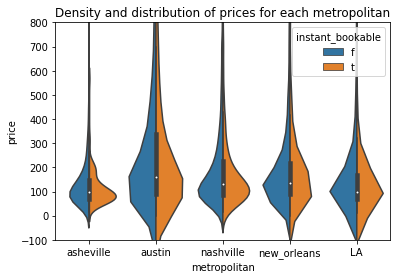

In [3]:
plot=sns.violinplot(data=listings, x='metropolitan', y='price', hue='instant_bookable', split=True)
plot.set_title('Density and distribution of prices for each metropolitan')
plot.set(ylim=(-100, 800))

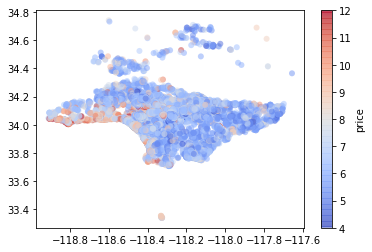

In [4]:
lon, lat, price = listings.query("metropolitan=='LA'")['longitude'], listings.query("metropolitan=='LA'")['latitude'], listings.query("metropolitan=='LA'")['price']
plt.scatter(lon, lat, label=None, c=np.log2(price), cmap='coolwarm',linewidth=0, alpha=0.5)
plt.colorbar(label='price')
plt.clim(4, 12)

In [5]:
demographics = pd.read_csv('demographics.csv')  
print(demographics.head())

   Unnamed: 0  zipcode  population  5_years_or_less  5-9_years  10-14_years  \
0           0      601       17982             1006       1080         1342   
1           1      602       40260             2006       2440         2421   
2           2      603       52408             2664       3177         3351   
3           3      606        6331              347        331          461   
4           4      610       28328             1438       1490         2044   

   15-19_years  20-24_years  25-34_years  35-44_years  ...  $9,999_or_less  \
0         1352         1321         2253         2149  ...            48.1   
1         2953         2865         5124         5139  ...            31.4   
2         3685         3585         6473         6775  ...              31   
3          474          469          707          933  ...            45.3   
4         2122         1985         3358         3778  ...            26.9   

   $10,000-$14,999  $15,000-$24,999  $25,000-$34,999  $3

In [6]:
zip_pop_dict = demographics[['zipcode', 'population']].astype(str).set_index('zipcode').to_dict()['population']

In [7]:
x = listings['zipcode'].map(zip_pop_dict)
y = listings[['price']]

<AxesSubplot:xlabel='population', ylabel='price'>

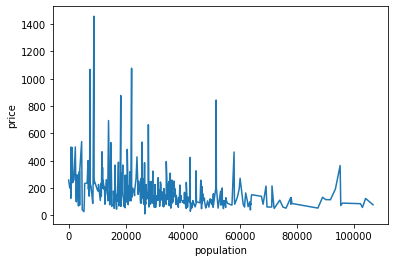

In [8]:
df = pd.concat([x,y], axis=1, ignore_index=True).dropna()
df.columns = ['population', 'price']
df['population'] = df['population'].astype(float)
df = df.sort_values(['population']).groupby(by=['population']).mean().reset_index()
sns.lineplot(data=df, x='population', y='price')

In [9]:
x, y = df['population'].values.reshape(-1, 1), df['price'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

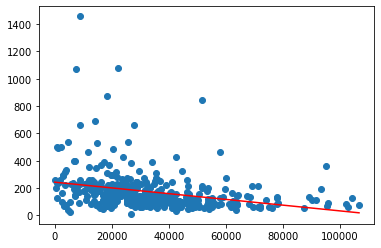

In [10]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [11]:
calendar = pd.read_csv('calendar_cleaned.csv')  
print(calendar.head())

   Unnamed: 0  listing_id        date  available  price metro_area
0           0      665257  2016-04-22      False    NaN  asheville
1           1      665257  2016-04-23      False    NaN  asheville
2           2      665257  2016-04-24      False    NaN  asheville
3           3      665257  2016-04-25      False    NaN  asheville
4           4      665257  2016-04-26      False    NaN  asheville


date metro_area  Unnamed: 0  listing_id  available  price
0  2016-04-20  asheville          60          60         60     60
1  2016-04-21  asheville         142         142        142    142
2  2016-04-22  asheville         100         100        100    100
3  2016-04-23  asheville         119         119        119    119
4  2016-04-24  asheville         394         394        394    394

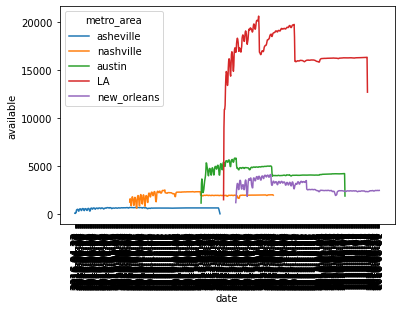

In [12]:
df = calendar[(calendar.available==True)].groupby(['date', 'metro_area']).count().reset_index()
sns.lineplot(data=df, x="date", y="available", hue='metro_area')
plt.xticks(rotation=90)
df.head()

date metro_area  Unnamed: 0  listing_id  available  price
0  2016-10-01  nashville         828         828        828    828
1  2016-10-02  nashville        1397        1397       1397   1397
2  2016-10-03  nashville        1886        1886       1886   1886
3  2016-10-04  nashville        2011        2011       2011   2011
4  2016-10-05  nashville        1935        1935       1935   1935

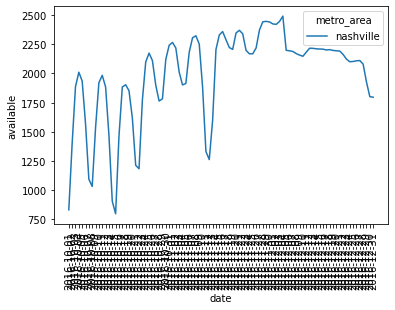

In [13]:
df = calendar[(calendar.available==True) & (calendar.date.str.startswith('2016-1')& (calendar.metro_area=='nashville'))].groupby(['date', 'metro_area']).count().reset_index()
sns.lineplot(data=df, x="date", y="available", hue='metro_area')
plt.xticks(rotation=90)
df.head()

<AxesSubplot:xlabel='date', ylabel='price'>

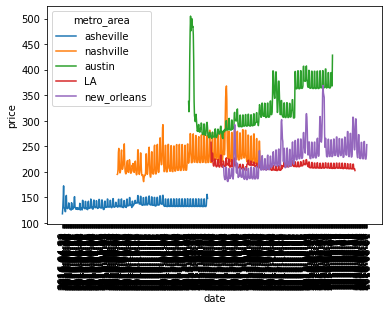

In [20]:
df = calendar[(calendar.available==True)].groupby(['date', 'metro_area']).mean().reset_index()
df.head()
plt.xticks(rotation=90)
sns.lineplot(data=df, x="date", y="price", hue='metro_area')

<AxesSubplot:xlabel='date', ylabel='price'>

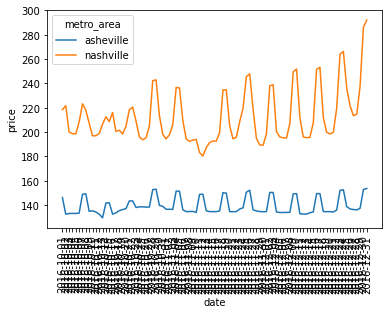

In [21]:
df = calendar[(calendar.available==True) & (calendar.date.str.startswith('2016-1'))].groupby(['date', 'metro_area']).mean().reset_index()
df.head()
plt.xticks(rotation=90)
sns.lineplot(data=df, x="date", y="price", hue='metro_area')